# 机器学习实训：手写数字识别

<font color="blue">作者：欧新宇（Xinyu OU）</font>

<font color="red">本文档所展示的测试结果，均运行于：Intel Core i7-7700K CPU 4.2GHz</font>

## 任务说明

### 1. 任务说明
---
构建一个模型，对给定的数字样本进行分类识别。

![](https://ai-studio-static-online.cdn.bcebos.com/ba26eac845334208851e72c7a2dfef5e1eec566894ba430aba7492e72c49cacd)

具体任务包括：
1. 任务一：训练模型并对模型进行评估
2. 任务二：单图片预测
3. 完成任务一、二的所有代码，并保留运行结果
4. 完善Notebook并输出为PDF格式（需要经过html进行中转），作为课程实训报告的正文部分。首页模板请在课程网站“教学文件”中进行下载。
5. 最终的实训报告，要求在Notebook中添加必要的文字说明，不能只提交代码。可以从模型的描述，模型的选择，多个模型的实验结果对比等多个角度进行撰写。
6. 将完整代码和运行结果在AIStudio平台进行提交

### 2. 数据集说明
---
MNIST数据集包含70000个样本，其中训练集60000个，测试集10000个。每个样本都分为图片和标签，图片是28\*28的像素矩阵，标签是0~9的10个数字。
![](https://ai-studio-static-online.cdn.bcebos.com/fc73217ae57f451a89badc801a903bb742e42eabd9434ecc8089efe19a66c076)


### 3. 必要依赖库

1. **numpy**: Python第三方库计算库，用于进行科学计算
2. **PIL**: Python第三方图像处理库，用于图像数据的读取和处理
3. **matplotlib**: Python第三方绘图库，用于实现数据可视化
4. **sklearn**: Python机器学习库，其中封装了大量机器学习算法，例如：SVM、KMeans、NLP、决策树、KNN等。


### 4. 基本要求

将数据集的划分严格按照原始数据集的规则60000:10000，同时在进行训练的时候只使用20%的样本，测试的时候仍然使用完整的10000个样本。


### 5. 保存数据集中的图片

该方法仅用于保存数据集的图片，并进行测试使用，不做考评

In [1]:
import os
import sys
import numpy as np  
import matplotlib.pyplot as plt
from PIL import Image
sys.path.append(os.path.join(os.getcwd(), '..', 'Modules'))
import load_MNIST

X_test = load_MNIST.load_test_images()
y_test = load_MNIST.load_test_labels()

image_id = 9999  # 设置要保存的样本ID X_test[0:9999]

# 将numpy数组转换为PIL图像
img = Image.fromarray(np.uint8(X_test[image_id]))

# 显示要保存的图片
# plt.imshow(img)

# 保存PIL图像到磁盘指定路径
filename = 'mnist' + str(image_id) + '.png'
img.save(os.path.join(os.getcwd(), 'tmp', filename))

开始载入MNIST手写数字数据集：
 测试集图片大小: 28*28, 已载入10000/10000.
测试集标签数量: 10000...已完成。


## <font style="color:blue; font-weight:bold;">示例代码</font>

### **任务一：训练模型并对模型进行评估**

#### **Step0: 导入依赖库**

In [2]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..', 'Modules'))
import load_MNIST
import joblib                       # 载入保存和载入模型的库工具

import numpy as np                  # Python第三方科学计算库
import matplotlib.pyplot as plt     # Python第三方绘图库
from PIL import Image               # Python第三方图像处理库
import time                         # 获取当前的时间戳
                     
from sklearn import naive_bayes     # 导入朴素贝叶斯包
from sklearn import svm             # 导入SVM支持向量机包
from sklearn import neural_network  # 导入MLP神经网络包

#### **Step1: 数据准备**

基本步骤如下:
1. 下载mnist数据集，并保存到根目录 `/Datasets/mnist/` 文件夹中。下载地址：http://ouxinyu.cn/Teaching/MachineLearning/Datasets/mnist.rar
2. 下载mnist数据库载入程序，并保存到根目录 `/Modules/load_MNIST.py` 文件中。下载地址：http://ouxinyu.cn/Teaching/MachineLearning/Modules/load_MNIST.py
3. 使用load_MNIST载入数据
4. 对载入数据进行预处理
5. 为了简化训练，截取20\%的的训练数据训练模型。

In [3]:
# 1. 载入数据
def load_datasets(show_examples = False):
    X_train = load_MNIST.load_train_images()
    y_train = load_MNIST.load_train_labels()
    X_test = load_MNIST.load_test_images()
    y_test = load_MNIST.load_test_labels()
    
    if show_examples == True:
        sample = X_train[1,:,:]
        plt.imshow(sample)
        print('样例的矩阵形式为:\n {}'.format(sample))
    
    return X_train, X_test, y_train, y_test 

# 2. 对数据进行预处理
def preprocessing(im):
    num = im.shape[0]
    im = im.reshape(num, imgSize*imgSize)
    im = im/255
#     im = im*2 - 1

    return im

# 3. 提取部分训练集数据
# 为了提高训练速度，我们只提取部分样本进行演示
# rate:提取的样本占总训练集的比率；
# show_examples:是否显示样例图片,默认值为False
def get_lite(rate, X_train, y_train, show_examples = False):
    num_train = int(rate * X_train.shape[0])
    
    X_train_lite = X_train[0:num_train-1,:]
    y_train_lite = y_train[0:num_train-1]   
    
    if show_examples == True:
        sample = X_train_lite[1,:]
        sample = sample.reshape(imgSize, imgSize)
        plt.imshow(sample)
        plt.show()
        print('样例(lite)的矩阵形式为:\n {}'.format(sample))
    
    return X_train_lite, y_train_lite

In [4]:
# X_train, X_test, y_train, y_test = load_datasets(show_examples = False)

# 数据预处理只需要针对样本，而不需要针对样本的标签
# X_train = preprocessing(X_train)
# X_test = preprocessing(X_test)

# X_train, y_train = get_lite(rate, X_train, y_train, show_examples = True)

#### **Step2：创建模型**

##### - 朴素贝叶斯

In [5]:
def Bayes():
    model = naive_bayes.GaussianNB()
    
    return model

##### - SVM支持向量机

In [6]:
def SVM():
    model = svm.SVC(C=0.5,                           #误差项惩罚系数, 默认值是1
                    kernel='rbf',                    #kernel= {线性核: 'linear', 高斯核: kenrel="rbf"}
                    decision_function_shape='ovr',   #决策函数 decision_function_shape={'ovr','ovo'}
                    gamma='auto')
    
    return model

##### - 多层感知机

In [7]:
def MLP():
    model = neural_network.MLPClassifier(
        solver='lbfgs',                      # 优化器solver={'lbfgs', 'sgd', 'adam'}
        hidden_layer_sizes=[100,100],        # 隐层单元
        activation='relu',                   # 激活函数activation={'identity', 'logistic', 'tanh', 'relu'}
        alpha=1e-5,                          # 正则化参数
        max_iter=400)                        # 最大迭代次数  
#        learning_rate='constant',           # 学习率={'constant', 'invscaling', 'adaptive'}
#        momentum=0.9)                       # 动量，默认值0.9, 一般是在SGD算法中使用
    
    return model

#### **Step3: 模型训练**

In [8]:
def train(model, x_train,y_train):
    model.fit(X_train,               #训练集特征向量
              y_train.ravel())       #训练集目标值

In [9]:
# train(model, X_train, y_train)

#### **Step4: 保存模型**

In [10]:
# 将训练好的模型保存到指定文件夹
def save_model(model, model_path):
    joblib.dump(model, model_path)

#### **Step5: 模型评估**

In [11]:
def print_results(model, model_name, X_train, y_train, X_test, y_test):
    print('{}模型:'.format(model_name))
    
    # 分别打印训练集和测试集的准确率  score(X_train,y_train):输出X_train,X_test在模型上的准确率
    print('训练集评分: {:.3f}'.format(model.score(X_train, y_train)))
    print('测试集评分: {:.3f}'.format(model.score(X_test, y_test)))
    
    # 计算决策函数的值，表示x到各分割平面的距离(该函数只支持SVM)
#     print('decision_function:\n', model.decision_function(X_train))

In [12]:
#  print_results(model,X_train,y_train,X_test,y_test)

#### **Step6: 执行主函数Main**

在Python中，定义好的函数必须要经过调用才能被执行。我们通常使用一个主函数`__main__`来实现其他函数的调用和执行。

In [14]:
if __name__ == '__main__':
# 0. 全局超参数配置
    rate        = 0.2       # 抽取一定比例的样本作为测试
    imgSize     = 28         # 图片尺寸
    model_name  = 'Bayes'      # 定义模型名称：{'0':'Bayes','1':'SVM','2':'MLP'} 
    nowtime     = time.strftime('%Y%m%d%H%M%S',time.localtime(time.time()))   # 获取当前时间
    modelPath   = 'model/Exp02MNIST_' + model_name + nowtime + '.pkl'         # 获取模型保存路径     

# 1. 准备数据集
    X_train, X_test, y_train, y_test = load_datasets(show_examples = False)

    X_train = preprocessing(X_train)
    X_test = preprocessing(X_test)
    
    # 压缩训练集的数据量
#     X_train, y_train = get_lite(rate, X_train, y_train, show_examples = True) 
    X_train, y_train = get_lite(rate, X_train, y_train)    
        
    
# 2. 定义模型：SVM模型定义
    if model_name is 'Bayes':
        model = Bayes()
    if model_name is 'SVM':
        model = SVM()
    if model_name is 'MLP':
        model = MLP()
            
# 3. 启动训练过程
    train(model, X_train, y_train)
                    
# 4. 保存模型
    joblib.dump(model, modelPath) 

# 5. 模型评估
    print_results(model, model_name, X_train, y_train, X_test, y_test)

 训练集图片大小: 28*28, 已载入60000/60000.
训练集标签数量: 60000...已完成。
 测试集图片大小: 28*28, 已载入10000/10000.
测试集标签数量: 10000...已完成。
Bayes模型:
训练集评分: 0.606
测试集评分: 0.562


In [15]:
###################以下显示实例代码中三个模型的运行结果#############
# SVM模型运行结果
# Last executed at 2020-05-05 14:57:15 in 2m 5.04s
# SVM模型:
# 训练集评分: 0.952
# 测试集评分: 0.939
    
#MLP模型运行结果
# Last executed at 2020-05-05 15:02:08 in 36.52s    
# MLP模型:
# 训练集评分: 1.000
# 测试集评分: 0.946

### **任务二：单图片预测**

#### **Step1. 载入图片**

In [17]:
def load_image(file_path, show_examples = False):
    im = Image.open(file_path).convert('L')  # 使用PIL将载入图像文件，并转换为灰度模式，L表示灰度图像模式
    im = np.array(im).astype(np.float32)     # 将plt图像转换为numpy数组
        
    if show_examples == True:                # 根据超参数决定是否显示图像
        plt.imshow(im)
    
    im = im.reshape(1,imgSize,imgSize)       # 将数组转换成[Channel, Height, Width]形式

    return im

In [18]:
# file_path = 'tmp/mnist34.png'
# im = load_image(file_path, show_examples = True)

#### **Step2. 图像预处理**

可共用训练模型时所使用的预处理函数`preprocessing()`，**而且通常也应该使用同一个函数，以保证预处理的一致性。**

In [19]:
# im = preprocessing(im)

#### **Step3: 载入模型**

In [20]:
def load_model(model_path):
    model = joblib.load(model_path)
    return model

In [21]:
# model = load_model(model_path)

#### **Step4. 预测图像**

In [22]:
def predict(model, im):
    print('待预测样本的标签是:{:.0f}'.format(model.predict(im)[0]))

#### **Step5. 执行主函数**

待预测样本的标签是:6


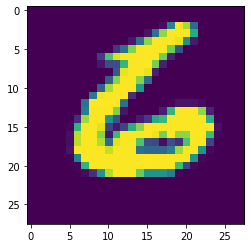

In [23]:
if __name__ == '__main__':
# Step0. 全局超参数配置
    imgSize    = 28     # 图片尺寸
    image_id   = 9999   # 设置测试集中的图片ID                        
    file_path  = os.path.join('tmp', 'mnist' + str(image_id) + '.png')                         # 待预测图片路径
    model_path = 'model/Exp02MNIST_MLP20200506132544.pkl'    # 模型保存路径，附带上当前时间戳
    
# Step1. 载入图片
#    im = load_image(filePath)
    im = load_image(file_path, show_examples = True)
    
# Step2. 图像预处理
    im = preprocessing(im)

# Step3. 载入模型
    model = load_model(model_path)
    
# Step4. 预测图像
    predict(model, im)
